In [1]:
# Run this notebook with `dna_features_viewer` kernel

"""
Select complete BGCs from unmapped_reads from four datasets
"""

import pandas as pd

In [24]:
# Below function adapted from https://github.com/nickbhat/bgc_tran/blob/0111c0448918accf2b9d91654f08ff3c8502ff39/old_notebooks/plot_mibig.py
def plot_gbk(gbk_file):
    from Bio import SeqIO
    from dna_features_viewer import GraphicFeature, GraphicRecord

    colors = {'biosynthetic': "#850000",
         'biosynthetic-additional': "#ea8686",
         'other': "#dbdbdb",
         'regulatory': "#7cd369",
         'resistance': "#307321",
         'transport': "#3c85cd"}

    genes = []
    length = 0
    last_end = 0

    for record in SeqIO.parse(gbk_file, "genbank"):
        for feature in record.features:
            if feature.type == 'CDS':
                try: 
                    if feature.qualifiers['gene_kind'][0] == 'biosynthetic':
                        print(feature)
                except:
                    pass
                
                try:
                    color = colors[feature.qualifiers['gene_kind'][0]]
                except:
                    color = colors['other']

                    
                if feature.location.start < last_end:
                    start = last_end + 1  
                else:
                    start = feature.location.start

                genes.append(GraphicFeature(start=start, end=feature.location.end, strand=feature.location.strand, color=color))

                if feature.location.end > length:
                    length = feature.location.end
                last_end = feature.location.end

                continue

    record = GraphicRecord(sequence_length=length, features=genes)
    record.plot(figure_width=15) 

In [3]:
df_bgc_all_metadata = pd.read_csv("HiFiBGC_0.1.13_Run/human.out/05_final_output/BGC_all_metadata.tsv", sep='\t')
# Select complete BGCs from unmapped_reads
df_bgc_all_metadata_subset = df_bgc_all_metadata[(df_bgc_all_metadata['Contig_Edge'] == False) & (df_bgc_all_metadata['BGC_Id'].apply(lambda x: x.split('.')[0]) == 'unmapped_reads')]
df_bgc_all_metadata_subset

,BGC_Id,Contig_Id,BGC_Length,Contig_Edge,BGC_Product,Family_Number,Representative_Member


In [4]:
df_bgc_all_metadata = pd.read_csv("HiFiBGC_0.1.13_Run/sheep.out/05_final_output/BGC_all_metadata.tsv", sep='\t')
# Select complete BGCs from unmapped_reads
df_bgc_all_metadata_subset = df_bgc_all_metadata[(df_bgc_all_metadata['Contig_Edge'] == False) & (df_bgc_all_metadata['BGC_Id'].apply(lambda x: x.split('.')[0]) == 'unmapped_reads')]
df_bgc_all_metadata_subset

,BGC_Id,Contig_Id,BGC_Length,Contig_Edge,BGC_Product,Family_Number,Representative_Member


In [5]:
df_bgc_all_metadata = pd.read_csv("HiFiBGC_0.1.13_Run/sludge.out/05_final_output/BGC_all_metadata.tsv", sep='\t')
# Select complete BGCs from unmapped_reads
df_bgc_all_metadata_subset = df_bgc_all_metadata[(df_bgc_all_metadata['Contig_Edge'] == False) & (df_bgc_all_metadata['BGC_Id'].apply(lambda x: x.split('.')[0]) == 'unmapped_reads')]
df_bgc_all_metadata_subset

,BGC_Id,Contig_Id,BGC_Length,Contig_Edge,BGC_Product,Family_Number,Representative_Member


In [6]:
df_bgc_all_metadata = pd.read_csv("HiFiBGC_0.1.13_Run/chicken.out/05_final_output/BGC_all_metadata.tsv", sep='\t')
# Select complete BGCs from unmapped_reads
df_bgc_all_metadata_subset = df_bgc_all_metadata[(df_bgc_all_metadata['Contig_Edge'] == False) & (df_bgc_all_metadata['BGC_Id'].apply(lambda x: x.split('.')[0]) == 'unmapped_reads')]
df_bgc_all_metadata_subset

,BGC_Id,Contig_Id,BGC_Length,Contig_Edge,BGC_Product,Family_Number,Representative_Member
1617,unmapped_reads.SRR15214153.245025.region001,unmapped_reads.SRR15214153.245025,20132,False,RRE-containing,1613,True


**Among 4 datasets (human, sludge, sheep and chicken), only chicken dataset has a complete BGC from unmapped_reads.**

type: CDS
location: [10000:10132](+)
qualifiers:
    Key: gene_functions, Value: ['biosynthetic (rule-based-clusters) RRE-containing: Ranthipeptide_rSAM_RRE']
    Key: gene_kind, Value: ['biosynthetic']
    Key: locus_tag, Value: ['ctg1918_22']
    Key: sec_met_domain, Value: ['Ranthipeptide_rSAM_RRE (E-value: 4.8e-14, bitscore: 44.1, seeds: 20, tool: rule-based-clusters)']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MIHTYTLFDKNIVLDVNSGAVFEFDGLAFDLLSRLKGAETAAG']



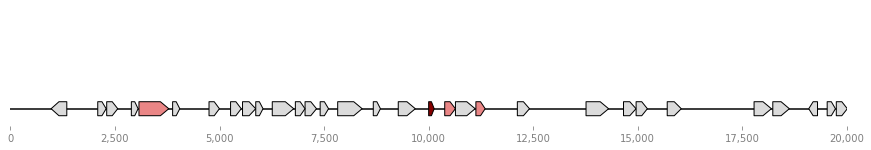

In [25]:
# Plot complete BGC from unmapped_reads, found in chicken dataset
item = 'unmapped_reads.SRR15214153.245025.region001'
plot_gbk(f"HiFiBGC_0.1.13_Run/chicken.out/05_final_output/BGC_all/{item}.gbk")